# <center>Project-Based Assignment CLO-2</center>

<b>Energy Efficiency</b>
Implementation of Supervised Learning on Regression Task  menggunakan SVM(SVR)

<b>Anggota Kelompok</b>
1. Ardhian Rizky Ayatollah Nur Ismail   - 1301213256
2. Syahran Hauli Fadhillah              - 1301213358
3. Annisa Fauziah                       - 1301213007

#### Latar Belakang


Pada tugas kali ini kami diberikan untuk memilih dataset menggunakan model regresi yang tersedia di website UCI Machine Learning Repository, yang dimana kelompok kami menggunakan dataset “Energy Efficiency”. Energy Efficiency menjadi faktor kunci dalam perencanaan dan desain bangunan, serta memiliki dampak signifikan pada konsumsi energi global. Oleh karena itu, pemahaman yang mendalam tentang faktor-faktor yang memengaruhi energi efisiensi bangunan sangat penting.

Dataset yang digunakan dalam tugas ini berisi berbagai fitur yang mendeskripsikan Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution, Heating Load, Cooling Load. Tujuan utama dari tugas ini adalah mengembangkan model regresi yang mampu memprediksi dua variabel terkait energi, yaitu "Heating Load" (beban pemanasan) dan "Cooling Load" (beban pendinginan) berdasarkan fitur-fitur yang tersedia dalam dataset.

Dengan menganalisis regresi, kita dapat mengidentifikasi faktor-faktor yang memiliki pengaruh signifikan pada konsumsi energi bangunan. Informasi ini dapat menjadi dasar dalam merancang bangunan yang lebih efisien dalam hal konsumsi energi di masa depan. Dengan memahami hubungan antara karakteristik bangunan dan konsumsi energinya, kita dapat berperan dalam mendukung pelestarian sumber daya alam dan lingkungan yang lebih berkelanjutan.


# Data Preprocessing

Import Library

In [4]:
# Data Preprocessing
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Dataset

In [5]:
#load data
df=pd.read_excel('ENB.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


Rename

In [8]:
#Rename Colums
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height',
            'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:
df.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [11]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Data duplicate

In [12]:
df.duplicated().sum()

0

Visualisasi

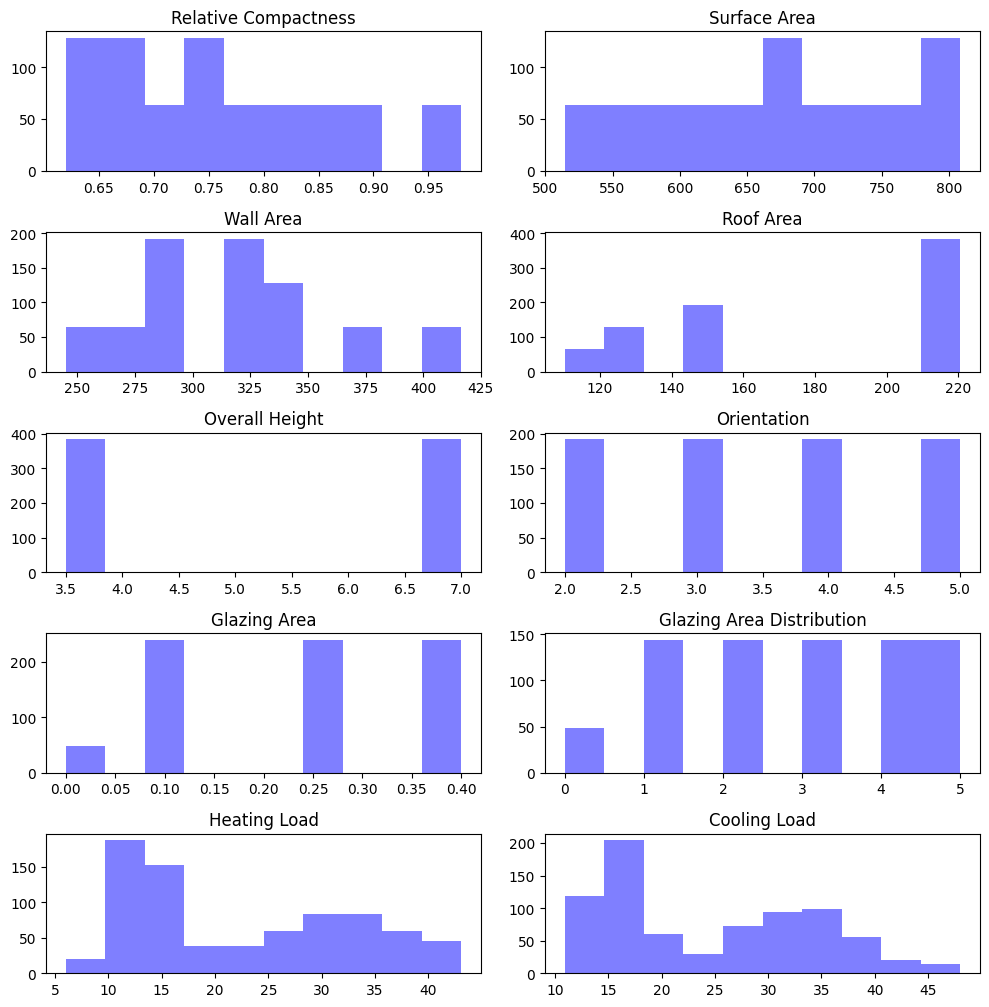

In [13]:
# Exploration Data Analysis
num_list = list(df.columns)

fig = plt.figure(figsize=(10,30))

# Loop melalui daftar nama kolom dan membuat subplot untuk setiap kolom
for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]],color='blue',alpha=0.5)

plt.tight_layout()

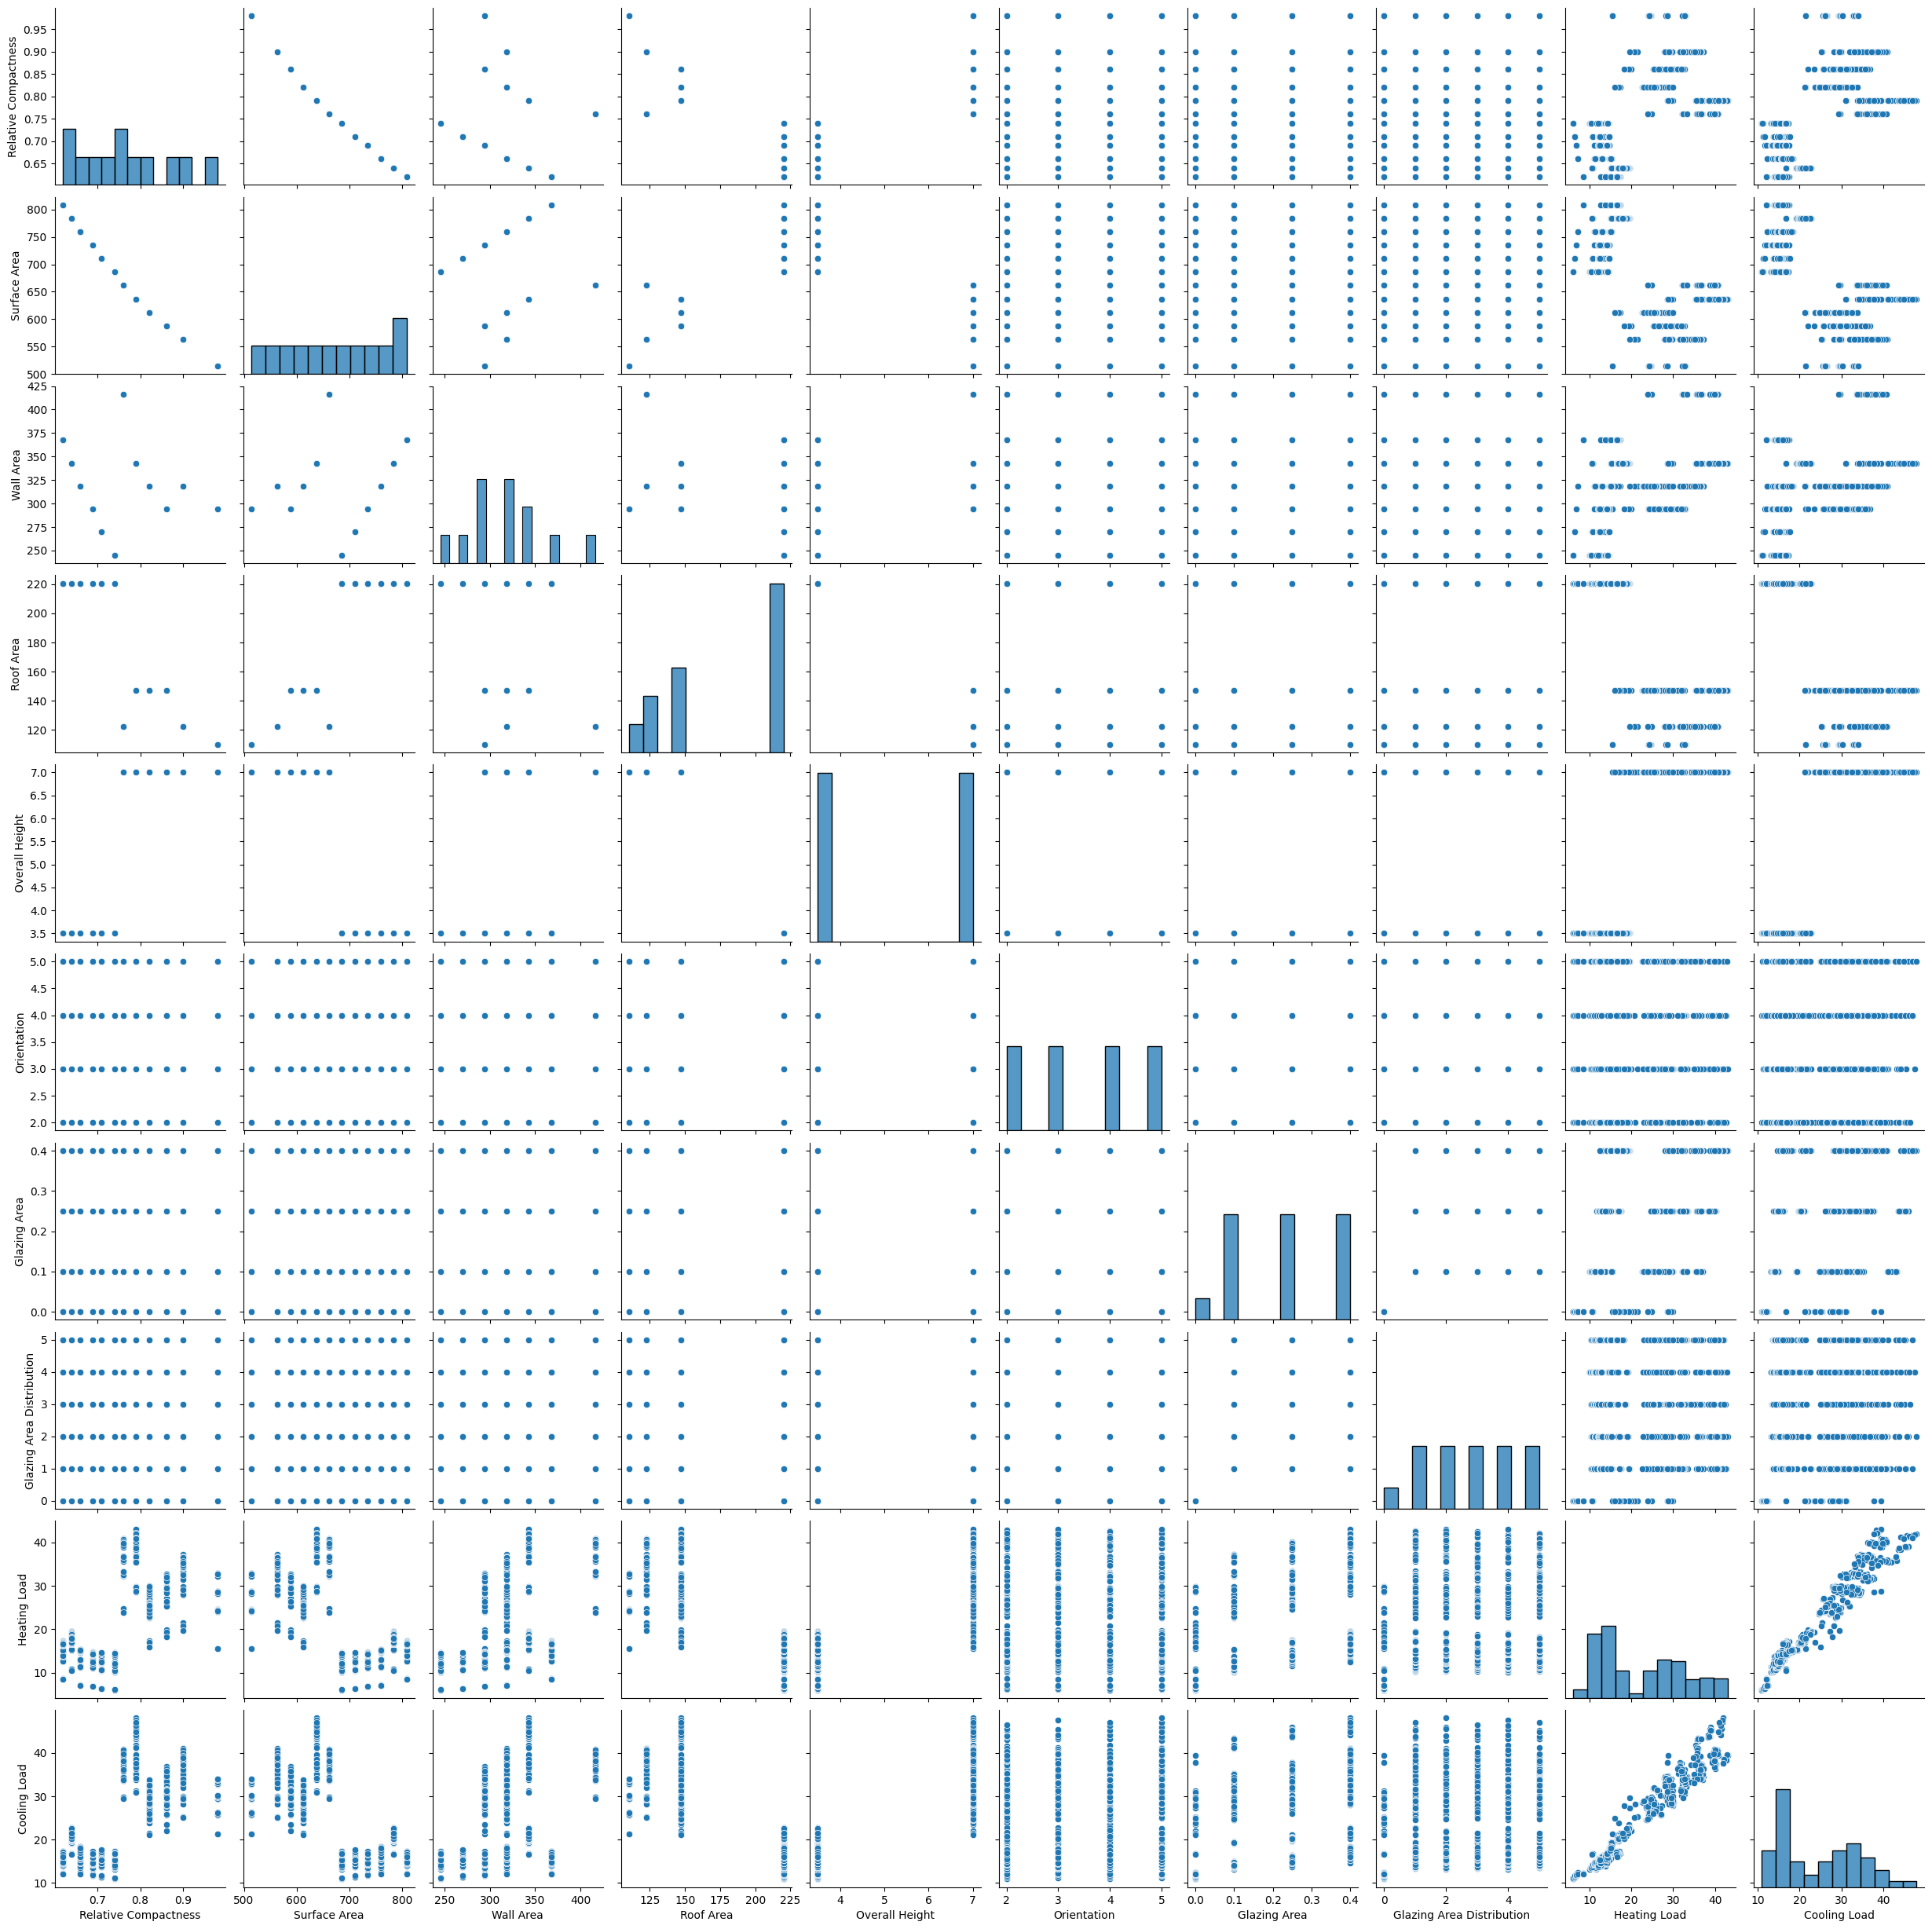

In [14]:
sns.pairplot(df)

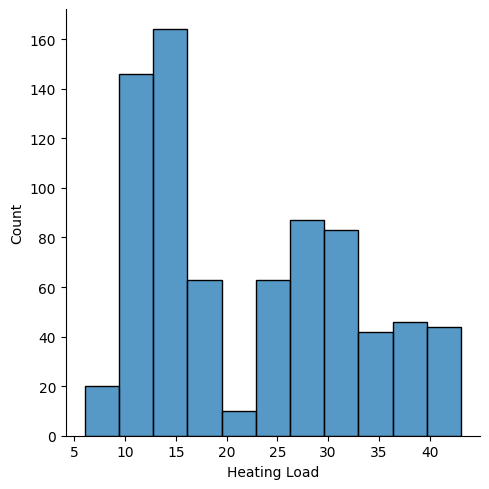

In [15]:
sns.displot(df['Heating Load'])


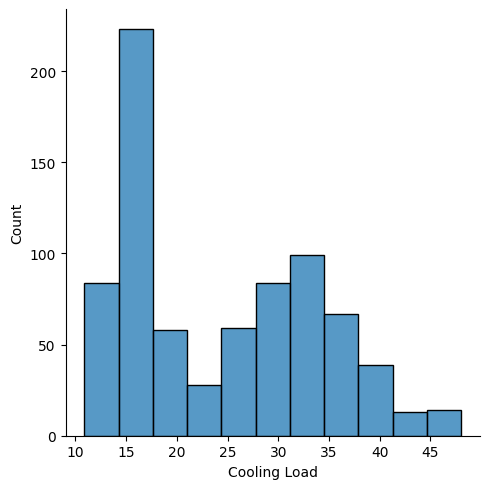

In [16]:
sns.displot(df['Cooling Load'])

<Axes: >

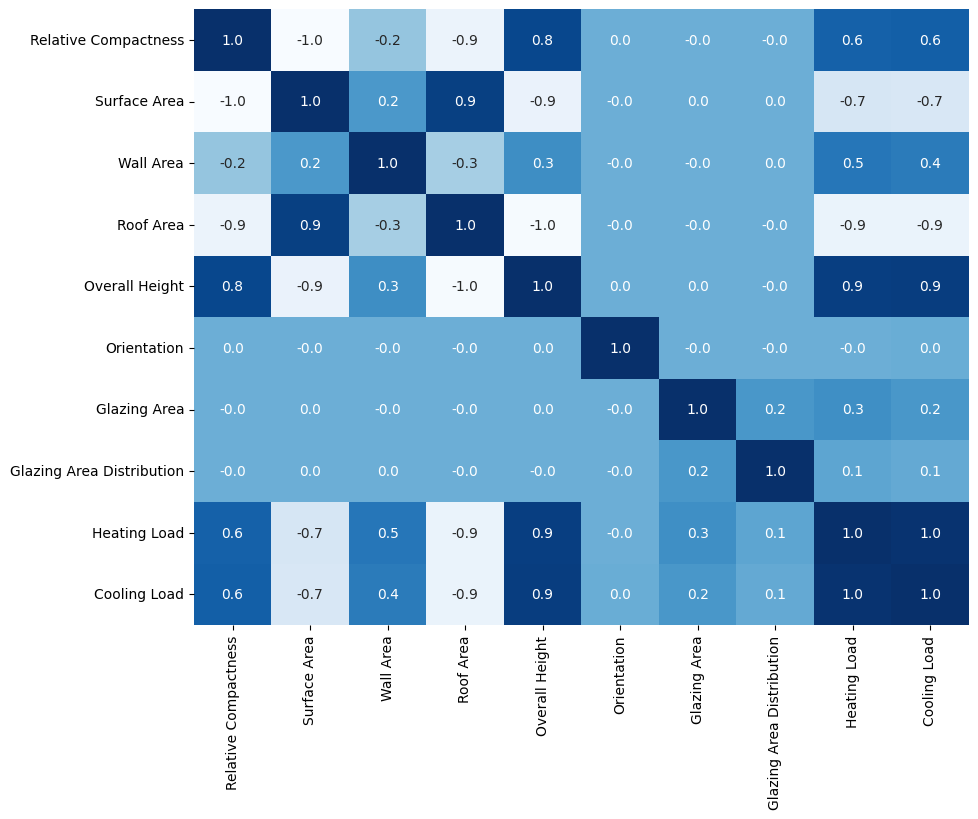

In [17]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

#### Ringkasan Metode
Metode yang digunakan dalam penelitian ini adalah SVM (Support Vector Machine) atau lebih khususnya SVR (Support Vector Regression), yang merupakan varian SVM yang digunakan untuk masalah regresi. Berikut adalah langkah-langkah metode yang diikuti:

Pemahaman Dataset: Kami memulai dengan pemahaman mendalam terhadap dataset "Energy Efficiency." Dataset ini berisi informasi tentang variabel-variabel seperti isolasi, orientasi bangunan, luas jendela, dan lainnya, serta target berupa informasi efisiensi energi.

Pemrosesan Data: Data preprocessing melibatkan tahap penyiapan data, termasuk penghapusan data yang hilang, normalisasi, dan pemilihan fitur jika diperlukan.

Pembagian Data: Data dibagi menjadi dua subset: data pelatihan dan data pengujian. Data pelatihan digunakan untuk melatih model SVM/SVR, sementara data pengujian digunakan untuk menguji kinerja model.

Pembuatan Model: Model SVR dibangun dengan menggunakan data pelatihan. Model ini mencoba untuk menemukan hubungan matematis yang paling cocok untuk memprediksi nilai efisiensi energi berdasarkan variabel input.

Evaluasi Model: Model SVR dievaluasi menggunakan metrik regresi, seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), dan R-squared (R^2). Evaluasi ini membantu kita memahami sejauh mana model dapat memprediksi nilai efisiensi energi dengan akurat.


#Modeling

Import library

In [18]:
#Import library
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [19]:
# Baseline Model
# Memisahkan dataset menjadi subset fitur (X) dan target (Y), dengan pemisahan lebih lanjut untuk target individu.
X=df.drop(['Heating Load','Cooling Load'],axis=1)# Tanpa kolom 'Heating Load' dan 'Cooling Load'
Y = df[['Heating Load', 'Cooling Load']]
Y1= df[['Heating Load']]
Y2= df[['Cooling Load']]

In [20]:
# Data pelatihan dan data pengujian untuk target individu (Y1 dan Y2) dengan perbandingan 70%:30%
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.30, random_state = 20)

# Menerapkan penskalaan Min-Max ke fitur-fitur dalam data pelatihan
MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
# Menerapkan penskalaan Min-Max yang sama ke fitur-fitur dalam data pengujian
X_test = MinMax.transform(X_test)

In [21]:
model_svr = SVR()
# Training model baseline (SVR) untuk y1
model_svr.fit(X_train, y1_train)
y1_train_pred_svr = model_svr.predict(X_train)
y1_test_pred_svr = model_svr.predict(X_test)

actr1_svr = r2_score(y1_train, y1_train_pred_svr)
acte1_svr = r2_score(y1_test, y1_test_pred_svr)

# Training model baseline (SVR) untuk y2
model_svr.fit(X_train, y2_train)
y2_train_pred_svr = model_svr.predict(X_train)
y2_test_pred_svr = model_svr.predict(X_test)

actr2_svr = r2_score(y2_train, y2_train_pred_svr)
acte2_svr = r2_score(y2_test, y2_test_pred_svr)

baseline_df = pd.DataFrame({'model': ["SVR"],
                        'train Heating (y1)': [actr1_svr],
                        'test Heating (y1)': [acte1_svr],
                        'train Cooling (y2)': [actr2_svr],
                        'test Cooling (y2)': [acte2_svr]})

baseline_df

,model,train Heating (y1),test Heating (y1),train Cooling (y2),test Cooling (y2)
0,SVR,0.930638,0.910719,0.893618,0.883726


Model Training

In [22]:
# Model Exploration (at least 3 scheme)
# Inisialisasi tiga model SVR dengan parameter yang berbeda
model_svr1 = SVR(kernel='linear', C = 10.0)
model_svr2 = SVR(kernel='rbf', C = 10.0)
model_svr3 = SVR(kernel='poly', degree = 5, C = 10.0)

# Training model pertama (SVR1) untuk y1
model_svr1.fit(X_train, y1_train)
y1_train_pred_svr1 = model_svr1.predict(X_train)
y1_test_pred_svr1 = model_svr1.predict(X_test)

actr1_svr1 = r2_score(y1_train, y1_train_pred_svr1)
acte1_svr1 = r2_score(y1_test, y1_test_pred_svr1)

# Training model pertama (SVR1) untuk y2
model_svr1.fit(X_train, y2_train)
y2_train_pred_svr1 = model_svr1.predict(X_train)
y2_test_pred_svr1 = model_svr1.predict(X_test)

actr2_svr1 = r2_score(y2_train, y2_train_pred_svr1)
acte2_svr1 = r2_score(y2_test, y2_test_pred_svr1)

# Training model kedua (SVR2) untuk y1
model_svr2.fit(X_train, y1_train)
y1_train_pred_svr2 = model_svr2.predict(X_train)
y1_test_pred_svr2 = model_svr2.predict(X_test)

actr1_svr2 = r2_score(y1_train, y1_train_pred_svr2)
acte1_svr2 = r2_score(y1_test, y1_test_pred_svr2)

# Training model kedua (SVR2) untuk y2
model_svr2.fit(X_train, y2_train)
y2_train_pred_svr2 = model_svr2.predict(X_train)
y2_test_pred_svr2 = model_svr2.predict(X_test)

actr2_svr2 = r2_score(y2_train, y2_train_pred_svr2)
acte2_svr2 = r2_score(y2_test, y2_test_pred_svr2)

# Training model ketiga (SVR3) untuk y1
model_svr3.fit(X_train, y1_train)
y1_train_pred_svr3 = model_svr3.predict(X_train)
y1_test_pred_svr3 = model_svr3.predict(X_test)

actr1_svr3 = r2_score(y1_train, y1_train_pred_svr3)
acte1_svr3 = r2_score(y1_test, y1_test_pred_svr3)

# Training model ketiga (SVR3) untuk y2
model_svr3.fit(X_train, y2_train)
y2_train_pred_svr3 = model_svr3.predict(X_train)
y2_test_pred_svr3 = model_svr3.predict(X_test)

actr2_svr3 = r2_score(y2_train, y2_train_pred_svr3)
acte2_svr3 = r2_score(y2_test, y2_test_pred_svr3)

# Membuat DataFrame dengan hasil R-squared (R2) untuk masing-masing model
model_df = pd.DataFrame({'model': ["SVR1", "SVR2", "SVR3"],
                        'train Heating (y1)': [actr1_svr1, actr1_svr2, actr1_svr3],
                        'test Heating (y1)': [acte1_svr1, acte1_svr2, acte1_svr3],
                        'train Cooling (y2)': [actr2_svr1, actr2_svr2, actr2_svr3],
                        'test Cooling (y2)': [acte2_svr1, acte2_svr2, acte2_svr3]})

model_df


,model,train Heating (y1),test Heating (y1),train Cooling (y2),test Cooling (y2)
0,SVR1,0.911176,0.904679,0.881105,0.879197
1,SVR2,0.946465,0.927517,0.919138,0.909210
2,SVR3,0.994360,0.991042,0.975341,0.963307


In [23]:
# Menghitung MAE, MSE, dan RMSE untuk model SVR1 pada y1
mae_svr1_y1 = mean_absolute_error(y1_test, y1_test_pred_svr1)
mse_svr1_y1 = mean_squared_error(y1_test, y1_test_pred_svr1)
rmse_svr1_y1 = np.sqrt(mse_svr1_y1)

# Menghitung MAE, MSE, dan RMSE untuk model SVR1 pada y2
mae_svr1_y2 = mean_absolute_error(y2_test, y2_test_pred_svr1)
mse_svr1_y2 = mean_squared_error(y2_test, y2_test_pred_svr1)
rmse_svr1_y2 = np.sqrt(mse_svr1_y2)

# Menghitung MAE, MSE, dan RMSE untuk model SVR2 pada y1
mae_svr2_y1 = mean_absolute_error(y1_test, y1_test_pred_svr2)
mse_svr2_y1 = mean_squared_error(y1_test, y1_test_pred_svr2)
rmse_svr2_y1 = np.sqrt(mse_svr2_y1)

# Menghitung MAE, MSE, dan RMSE untuk model SVR2 pada y2
mae_svr2_y2 = mean_absolute_error(y2_test, y2_test_pred_svr2)
mse_svr2_y2 = mean_squared_error(y2_test, y2_test_pred_svr2)
rmse_svr2_y2 = np.sqrt(mse_svr2_y2)

# Menghitung MAE, MSE, dan RMSE untuk model SVR3 pada y1
mae_svr3_y1 = mean_absolute_error(y1_test, y1_test_pred_svr3)
mse_svr3_y1 = mean_squared_error(y1_test, y1_test_pred_svr3)
rmse_svr3_y1 = np.sqrt(mse_svr3_y1)

# Menghitung MAE, MSE, dan RMSE untuk model SVR3 pada y2
mae_svr3_y2 = mean_absolute_error(y2_test, y2_test_pred_svr3)
mse_svr3_y2 = mean_squared_error(y2_test, y2_test_pred_svr3)
rmse_svr3_y2 = np.sqrt(mse_svr3_y2)

# Membuat DataFrame dengan hasil MAE, MSE, dan RMSE untuk masing-masing model
mae_mse_rmse_df = pd.DataFrame({
    'Model': ["SVR1 (y1)", "SVR1 (y2)", "SVR2 (y1)", "SVR2 (y2)", "SVR3 (y1)", "SVR3 (y2)"],
    'MAE': [mae_svr1_y1, mae_svr1_y2, mae_svr2_y1, mae_svr2_y2, mae_svr3_y1, mae_svr3_y2],
    'MSE': [mse_svr1_y1, mse_svr1_y2, mse_svr2_y1, mse_svr2_y2, mse_svr3_y1, mse_svr3_y2],
    'RMSE': [rmse_svr1_y1, rmse_svr1_y2, rmse_svr2_y1, rmse_svr2_y2, rmse_svr3_y1, rmse_svr3_y2]
})

mae_mse_rmse_df

,Model,MAE,MSE,RMSE
0,SVR1 (y1),2.133209,9.964723,3.156695
1,SVR1 (y2),2.223112,10.924680,3.305250
2,SVR2 (y1),1.595611,7.577266,2.752683
3,SVR2 (y2),1.860146,8.210508,2.865398
4,SVR3 (y1),0.638800,0.936495,0.967727
5,SVR3 (y2),1.257104,3.318308,1.821622


#### Hasil dan Analisis
Dari hasil tersebut, model SVR yang telah di-tune memiliki kinerja yang baik, terutama dalam memprediksi y1 (heating load) dengan MAE yang rendah dan nilai R-squared yang tinggi pada kedua data pelatihan dan pengujian. Namun, pada prediksi y2 (cooling load), terdapat kesalahan yang lebih besar dengan MAE yang lebih tinggi.

#### Kesimpulan
Model Support Vector Regression (SVR) yang telah di-tune memiliki kinerja yang baik dalam memprediksi y1 (heating load) pada dataset energy efficiency. Hal ini ditunjukkan dengan tingginya nilai R-squared (R2) dan rendahnya Mean Absolute Error (MAE) serta Root Mean Squared Error (RMSE) pada data pelatihan dan pengujian. Namun, pada prediksi y2 (cooling load), terdapat kesalahan yang lebih besar dengan MAE yang lebih tinggi. Kesimpulannya, model SVR dapat digunakan untuk memprediksi dataset energy efficiency untuk memprediksi Y1 dan Y2.

Link video presentasi : https://www.youtube.com/watch?v=UsEnJxSsaXg